<hr/>

# Data Mining [EN.550.436]
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 16** - Oct 22, 2015

- Classification trees
- Random forests

<hr/>

<h1><font color="darkblue">Decision Tree Learning</font></h1>

- Recursive partitioning of the training dataset

> At a given node with dataset $D$ we look for the
> best split 

> $\theta = $ (feature $j$, threshold $t$) 

> such that the 
> partitions $D_{\textrm{left}}(\theta)$ and $D_{\textrm{right}}(\theta)$ have minimal *impurity*

> $\displaystyle I(\theta) = \frac{n_{\textrm{left}}}{n}\, H\Big(D_{\textrm{left}}(\theta)\Big) + \frac{n_{\textrm{right}}}{n}\,H\Big(D_{\textrm{right}}(\theta)\Big)$

- Different impurity functions $H(\cdot)$

> E.g., Gini for classifying into $K$ classes

>$\displaystyle H(D) = \sum_{i=1}^K p_i (1-p_i)$

> or variance for regression

- A binary tree!

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import tree
X = [[0,0], [1,0], [1,1]]
Y = [0, 1, 0]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

print clf.predict([ [2,2], [0.1,0], [0.2,1], [1,0.3] ])

[0 0 0 1]


### Exercise #1

Use the sklearn routines to 

- Load the iris datasets
- Run the decisions tree
- Cross-Validation
- Plots results
- Compare to same on whitened data

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,:2] # only first 2 features
Y = iris.target
# subset to classes 0 and 1
X,Y = X[Y<2,:], Y[Y<2]

print 'Num:', Y.size
print 'Cls:', np.unique(Y)

Num: 100
Cls: [0 1]


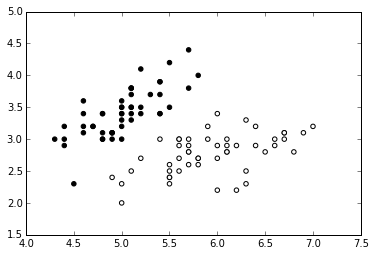

In [4]:
scatter(X[:,0],X[:,1],c=Y,cmap=cm.gray);

In [5]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=1)
clf.fit(X,Y)
print clf.tree_.n_node_samples
print clf.tree_.impurity
print clf.tree_.feature
print clf.tree_.threshold

[100  51  49]
[ 0.5         0.20761246  0.18325698]
[ 0 -2 -2]
[ 5.44999981 -2.         -2.        ]


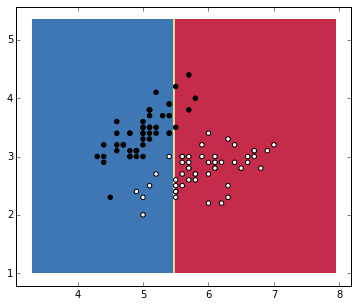

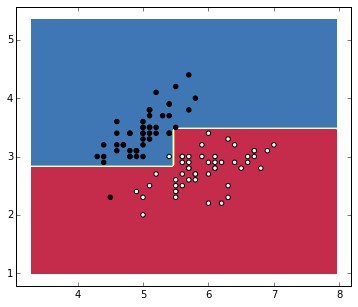

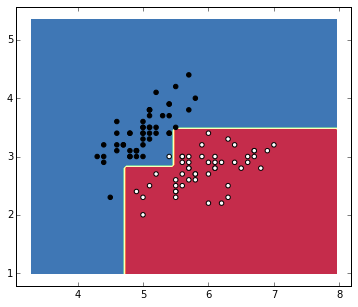

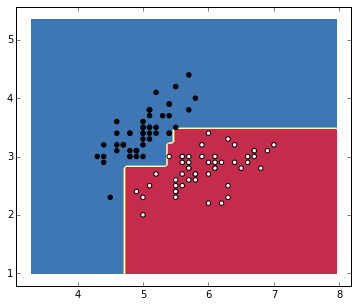

In [6]:
# grid of points within the limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# decision-surfaces as fn of max depth
for depth in range(1,5):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(X,Y)
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    figure(figsize=(6,5))
    contourf(xx, yy, Z, cmap=cm.Spectral_r)
    scatter(X[:,0],X[:,1],c=Y,cmap=cm.gray);

In [7]:
from sklearn import cross_validation as cv
print cv.cross_val_score(clf, X,Y, cv=10)

[ 1.   1.   1.   1.   1.   1.   0.9  0.9  0.9  1. ]


In [8]:
k_fold = cv.KFold(Y.size, 10, shuffle=True) 
for k, (train, test) in enumerate(k_fold):
    Ypred = clf.fit(X[train],Y[train]).predict(X[test])
    #print clf.tree_.threshold, 
    print k, ':\t', (Y[test]==Ypred).sum() / float(test.size),
    print '\t=', clf.score(X[test],Y[test])

0 :	0.9 	= 0.9
1 :	1.0 	= 1.0
2 :	1.0 	= 1.0
3 :	0.9 	= 0.9
4 :	0.9 	= 0.9
5 :	1.0 	= 1.0
6 :	0.9 	= 0.9
7 :	1.0 	= 1.0
8 :	1.0 	= 1.0
9 :	1.0 	= 1.0


In [11]:
from sklearn.decomposition import PCA
Z = PCA(whiten=True).fit_transform(X)
print cv.cross_val_score(clf, Z,Y, cv=10)

[ 1.   0.9  1.   1.   1.   1.   0.9  0.9  1.   1. ]


<h1><font color="darkblue">Random Forest</font></h1>

### Random Tree

- Hard to pick the *best* in high dimensions (i.e., very expensive)

> Instead we pick a number of random directions to search<br/>
> and take the optimal split among those

- A randomized tree will not be optimal but much faster to build

### Forest of Random Trees

- Create multiple randomized trees to classify

> Combine the results, e.g., voting

- Check out Boostrap and Bagging

### Exercise #2

- Repeat exercise #1 using the random forest classifer

[ 1.   0.9  1.   1.   1.   1.   0.9  1.   0.9  1. ]


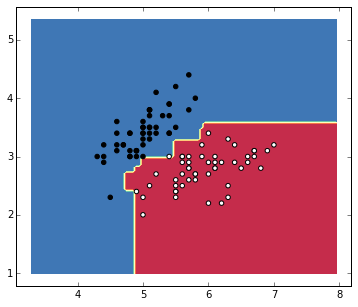

In [12]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=2)
clf.fit(X,Y)
Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
figure(figsize=(6,5))
contourf(xx, yy, Z, cmap=cm.Spectral_r)
scatter(X[:,0],X[:,1],c=Y,cmap=cm.gray);
print cv.cross_val_score(clf, X,Y, cv=10)

### Comparison of Classifiers

 - Check out the 
<a href="http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">demo script</a> running a bunch of classifiers in sklearn 